# Import Images

Batch script to import images from a list of files and pack it into an array for data analysis

In [14]:
import h5py
from PIL import Image
import numpy as np
import os
import glob

### Development REPL

In [25]:
taxonomies = glob.glob("Images/*")
for i in range(len(taxonomies)):
    taxonomy = taxonomies[i]
    break

In [26]:
for image in glob.glob(os.path.join(taxonomy,"*.jpg")):
    break

In [27]:
image

'Images/good/d8c0bca6-ee04-4936-a4fa-48d7853a4ad4.jpg'

In [28]:
image_jpg = os.path.splitext(image)[0]+".jpg"
image_jpg

'Images/good/d8c0bca6-ee04-4936-a4fa-48d7853a4ad4.jpg'

In [29]:
image_ = Image.open(image)

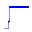

In [30]:
image_

In [31]:
np.asarray(image_).shape

(32, 32, 3)

## Batch Import

In [32]:
image_list = list()
classification_list = list()

taxonomies = glob.glob("Images/*")
for i in range(len(taxonomies)):
    taxonomy = taxonomies[i]
    
    classification = np.zeros(len(taxonomies))
    classification[i]=1.0
        
    for image in glob.glob(os.path.join(taxonomy,"*.jpg")):
        image_ = Image.open(image)
        image_list.append(np.asarray(image_)/255)
        classification_list.append(classification)

In [33]:
# Check that we imported everything equally.
assert len(image_list)==len(classification_list)

In [34]:
image_list = np.asarray(image_list)
classification_list = np.asarray(classification_list)

In [35]:
hdf_dataset = "imported_dataset.hdf5"

opts=dict()
opts["compression"]="gzip"
opts["compression_opts"]=9
with h5py.File(hdf_dataset, "w") as fid:
    fid.create_dataset("images", data=image_list, **opts)
    fid.create_dataset("classifications", data=classification_list, **opts)